In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Get stock data from finance yahoo data

import requests
nan=np.nan

In [2]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = f'https://api.tiingo.com/tiingo/daily/{stock_symbol}/prices?'
    token = '59e2dfca5859e44a55ef766a8f81aab1ab8a80e8'
    payload = {
        'startDate': start_date,
        'endDate': end_date,
        'token': token
    }
    response = requests.get(base_url, params=payload)
    return response

In [3]:
ticker = 'AMZN'
st_date = '2015-8-26'
#st_date = '2020-8-10'
en_date = '2020-9-8'

response = get_stock_data(ticker, st_date, en_date)
print(response.url)
print(response.json())

https://api.tiingo.com/tiingo/daily/AMZN/prices?startDate=2015-8-26&endDate=2020-9-8&token=59e2dfca5859e44a55ef766a8f81aab1ab8a80e8
[{'date': '2015-08-26T00:00:00.000Z', 'close': 500.77, 'high': 503.72, 'low': 478.76, 'open': 484.02, 'volume': 6358639, 'adjClose': 500.77, 'adjHigh': 503.72, 'adjLow': 478.76, 'adjOpen': 484.02, 'adjVolume': 6358639, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2015-08-27T00:00:00.000Z', 'close': 518.37, 'high': 522.69, 'low': 507.261, 'open': 514.03, 'volume': 6114506, 'adjClose': 518.37, 'adjHigh': 522.69, 'adjLow': 507.261, 'adjOpen': 514.03, 'adjVolume': 6114506, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2015-08-28T00:00:00.000Z', 'close': 518.01, 'high': 521.5, 'low': 513.04, 'open': 517.5, 'volume': 2746708, 'adjClose': 518.01, 'adjHigh': 521.5, 'adjLow': 513.04, 'adjOpen': 517.5, 'adjVolume': 2746708, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2015-08-31T00:00:00.000Z', 'close': 512.89, 'high': 519.41, 'low': 509.07, 'open': 516.44, 'vo

In [4]:
def parse_data(data_response):
    json_data = data_response.json()
    dates = []
    closes =[]
    opens = []
    highs = []
    lows = []
    vols = []
    for json_object in json_data:
        dates.append(json_object['date'])
        closes.append(json_object['close'])
        opens.append(json_object['open'])
        highs.append(json_object['high'])
        lows.append(json_object['low'])
        vols.append(json_object['volume'])
    return dates, closes, opens, highs, lows, vols

In [5]:
dates, closes, opens, highs, lows, vols = parse_data(response)
print(dates, closes)

['2015-08-26T00:00:00.000Z', '2015-08-27T00:00:00.000Z', '2015-08-28T00:00:00.000Z', '2015-08-31T00:00:00.000Z', '2015-09-01T00:00:00.000Z', '2015-09-02T00:00:00.000Z', '2015-09-03T00:00:00.000Z', '2015-09-04T00:00:00.000Z', '2015-09-08T00:00:00.000Z', '2015-09-09T00:00:00.000Z', '2015-09-10T00:00:00.000Z', '2015-09-11T00:00:00.000Z', '2015-09-14T00:00:00.000Z', '2015-09-15T00:00:00.000Z', '2015-09-16T00:00:00.000Z', '2015-09-17T00:00:00.000Z', '2015-09-18T00:00:00.000Z', '2015-09-21T00:00:00.000Z', '2015-09-22T00:00:00.000Z', '2015-09-23T00:00:00.000Z', '2015-09-24T00:00:00.000Z', '2015-09-25T00:00:00.000Z', '2015-09-28T00:00:00.000Z', '2015-09-29T00:00:00.000Z', '2015-09-30T00:00:00.000Z', '2015-10-01T00:00:00.000Z', '2015-10-02T00:00:00.000Z', '2015-10-05T00:00:00.000Z', '2015-10-06T00:00:00.000Z', '2015-10-07T00:00:00.000Z', '2015-10-08T00:00:00.000Z', '2015-10-09T00:00:00.000Z', '2015-10-12T00:00:00.000Z', '2015-10-13T00:00:00.000Z', '2015-10-14T00:00:00.000Z', '2015-10-15T00:00:0

In [6]:
data = pd.DataFrame(columns = ['Close'], index = dates)
dfindex = data.index
dfindex.name = 'Date'

In [7]:
data['Close']=closes

In [8]:
data

,Close
Date,
2015-08-26T00:00:00.000Z,500.77
2015-08-27T00:00:00.000Z,518.37
2015-08-28T00:00:00.000Z,518.01
2015-08-31T00:00:00.000Z,512.89
2015-09-01T00:00:00.000Z,496.54
...,...
2020-09-01T00:00:00.000Z,3499.12
2020-09-02T00:00:00.000Z,3531.45
2020-09-03T00:00:00.000Z,3368.00


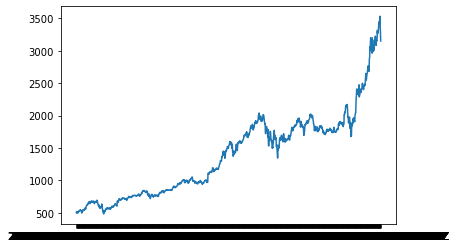

In [9]:
plt.plot(data['Close'])
plt.show()

In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.00613239]
 [0.01190406]
 [0.011786  ]
 ...
 [0.94639894]
 [0.92233503]
 [0.87485653]]


In [11]:
train_length = int(len(scaled_data) * 0.7)
test_length = len(scaled_data) - train_length
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]

print(train_length)
print(test_length)

887
381


In [12]:
def create_dataset(dataset, timestep=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - timestep - 1):
        data_x.append(dataset[i:(i+timestep),0])
        data_y.append(dataset[i+timestep,0])
    return np.array(data_x), np.array(data_y)

In [13]:
timestep = 1
train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

print(train_x)

[[0.00613239]
 [0.01190406]
 [0.011786  ]
 [0.01010697]
 [0.00474523]
 [0.0093396 ]
 [0.00742774]
 [0.00555195]
 [0.01163187]
 [0.01141871]
 [0.01317317]
 [0.01553431]
 [0.01289115]
 [0.0132158 ]
 [0.01486204]
 [0.01862674]
 [0.01908257]
 [0.02174868]
 [0.01847261]
 [0.01770852]
 [0.01694771]
 [0.01383232]
 [0.0072113 ]
 [0.0045911 ]
 [0.00977904]
 [0.01267471]
 [0.01655091]
 [0.02020411]
 [0.01817091]
 [0.0196335 ]
 [0.01675423]
 [0.01893172]
 [0.02233897]
 [0.02191593]
 [0.02058123]
 [0.02635618]
 [0.0290846 ]
 [0.02986837]
 [0.0258446 ]
 [0.02416885]
 [0.02683824]
 [0.03835534]
 [0.04149696]
 [0.04228401]
 [0.04428113]
 [0.04738012]
 [0.04716697]
 [0.04797041]
 [0.04697348]
 [0.05210239]
 [0.05692305]
 [0.05814297]
 [0.05687058]
 [0.05824463]
 [0.06269471]
 [0.06018601]
 [0.0525615 ]
 [0.05435203]
 [0.05287304]
 [0.05951046]
 [0.05876604]
 [0.06112062]
 [0.06457706]
 [0.06200605]
 [0.0633801 ]
 [0.06269799]
 [0.05992366]
 [0.06460002]
 [0.06359981]
 [0.06039916]
 [0.06249467]
 [0.06

In [14]:
print(train_x.shape)

(885, 1)


In [15]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

print(train_x)

[[[0.00613239]]

 [[0.01190406]]

 [[0.011786  ]]

 [[0.01010697]]

 [[0.00474523]]

 [[0.0093396 ]]

 [[0.00742774]]

 [[0.00555195]]

 [[0.01163187]]

 [[0.01141871]]

 [[0.01317317]]

 [[0.01553431]]

 [[0.01289115]]

 [[0.0132158 ]]

 [[0.01486204]]

 [[0.01862674]]

 [[0.01908257]]

 [[0.02174868]]

 [[0.01847261]]

 [[0.01770852]]

 [[0.01694771]]

 [[0.01383232]]

 [[0.0072113 ]]

 [[0.0045911 ]]

 [[0.00977904]]

 [[0.01267471]]

 [[0.01655091]]

 [[0.02020411]]

 [[0.01817091]]

 [[0.0196335 ]]

 [[0.01675423]]

 [[0.01893172]]

 [[0.02233897]]

 [[0.02191593]]

 [[0.02058123]]

 [[0.02635618]]

 [[0.0290846 ]]

 [[0.02986837]]

 [[0.0258446 ]]

 [[0.02416885]]

 [[0.02683824]]

 [[0.03835534]]

 [[0.04149696]]

 [[0.04228401]]

 [[0.04428113]]

 [[0.04738012]]

 [[0.04716697]]

 [[0.04797041]]

 [[0.04697348]]

 [[0.05210239]]

 [[0.05692305]]

 [[0.05814297]]

 [[0.05687058]]

 [[0.05824463]]

 [[0.06269471]]

 [[0.06018601]]

 [[0.0525615 ]]

 [[0.05435203]]

 [[0.05287304]

In [16]:
model = Sequential()
model.add(LSTM(256, input_shape=(1,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.fit(train_x, train_y, epochs=1, batch_size=1, verbose=1)
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras model loss = ', score[0])
print('Keras model accuracy = ', score[1])

885/885 [==============================] - 1s 1ms/step - loss: 0.0167 - accuracy: 0.0011
Keras model loss =  0.0011199015425518155
Keras model accuracy =  0.001129943528212607


In [18]:
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

print(train_predictions)

[[0.08103862]
 [0.08323899]
 [0.08319345]
 [0.08254826]
 [0.08051753]
 [0.08225495]
 [0.08152804]
 [0.08082026]
 [0.08313408]
 [0.08305204]
 [0.08372974]
 [0.08464941]
 [0.08362046]
 [0.08374619]
 [0.0843868 ]
 [0.08586743]
 [0.08604825]
 [0.08711246]
 [0.0858064 ]
 [0.0855042 ]
 [0.08520433]
 [0.08398566]
 [0.08144611]
 [0.0804598 ]
 [0.08242288]
 [0.08353674]
 [0.0850482 ]
 [0.08649459]
 [0.08568701]
 [0.08626726]
 [0.0851281 ]
 [0.08598843]
 [0.08734962]
 [0.08717957]
 [0.08664507]
 [0.0889785 ]
 [0.09009972]
 [0.09042403]
 [0.08876958]
 [0.08808836]
 [0.08917573]
 [0.09400108]
 [0.09535578]
 [0.0956977 ]
 [0.09657016]
 [0.09793749]
 [0.09784284]
 [0.09819973]
 [0.09775716]
 [0.1000526 ]
 [0.10225189]
 [0.10281494]
 [0.10222772]
 [0.10286209]
 [0.10493881]
 [0.10376373]
 [0.10026044]
 [0.10107389]
 [0.10040149]
 [0.1034492 ]
 [0.10310355]
 [0.10420009]
 [0.10582787]
 [0.10461506]
 [0.10526174]
 [0.10494033]
 [0.10364142]
 [0.10583872]
 [0.10536548]
 [0.10386306]
 [0.10484463]
 [0.10

In [19]:
train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform([train_y])

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

print(train_predictions)
print(test_predictions)

[[ 729.18756]
 [ 735.89734]
 [ 735.7585 ]
 [ 733.791  ]
 [ 727.5986 ]
 [ 732.8966 ]
 [ 730.68   ]
 [ 728.5217 ]
 [ 735.57745]
 [ 735.3273 ]
 [ 737.3938 ]
 [ 740.19824]
 [ 737.06055]
 [ 737.444  ]
 [ 739.3974 ]
 [ 743.9125 ]
 [ 744.4638 ]
 [ 747.709  ]
 [ 743.7263 ]
 [ 742.8048 ]
 [ 741.8904 ]
 [ 738.1742 ]
 [ 730.4302 ]
 [ 727.42255]
 [ 733.4087 ]
 [ 736.8053 ]
 [ 741.4143 ]
 [ 745.8249 ]
 [ 743.3623 ]
 [ 745.13165]
 [ 741.65796]
 [ 744.28143]
 [ 748.4322 ]
 [ 747.91364]
 [ 746.28375]
 [ 753.3993 ]
 [ 756.8183 ]
 [ 757.80725]
 [ 752.7622 ]
 [ 750.68494]
 [ 754.00073]
 [ 768.715  ]
 [ 772.846  ]
 [ 773.8887 ]
 [ 776.54913]
 [ 780.7186 ]
 [ 780.43005]
 [ 781.5183 ]
 [ 780.16876]
 [ 787.1684 ]
 [ 793.8749 ]
 [ 795.59186]
 [ 793.80115]
 [ 795.7356 ]
 [ 802.0683 ]
 [ 798.48505]
 [ 787.8022 ]
 [ 790.2827 ]
 [ 788.2323 ]
 [ 797.52594]
 [ 796.4719 ]
 [ 799.8157 ]
 [ 804.7794 ]
 [ 801.0811 ]
 [ 803.0531 ]
 [ 802.07294]
 [ 798.1121 ]
 [ 804.8125 ]
 [ 803.36945]
 [ 798.78796]
 [ 801.7811 ]
 [ 800

In [20]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predictions)+1, :] = train_predictions

In [21]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[
    len(train_predictions)+2+1:len(scaled_data)-1, :] = test_predictions

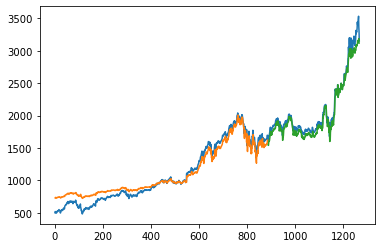

In [22]:
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [23]:
train_predictions

array([[ 729.18756],
       [ 735.89734],
       [ 735.7585 ],
       [ 733.791  ],
       [ 727.5986 ],
       [ 732.8966 ],
       [ 730.68   ],
       [ 728.5217 ],
       [ 735.57745],
       [ 735.3273 ],
       [ 737.3938 ],
       [ 740.19824],
       [ 737.06055],
       [ 737.444  ],
       [ 739.3974 ],
       [ 743.9125 ],
       [ 744.4638 ],
       [ 747.709  ],
       [ 743.7263 ],
       [ 742.8048 ],
       [ 741.8904 ],
       [ 738.1742 ],
       [ 730.4302 ],
       [ 727.42255],
       [ 733.4087 ],
       [ 736.8053 ],
       [ 741.4143 ],
       [ 745.8249 ],
       [ 743.3623 ],
       [ 745.13165],
       [ 741.65796],
       [ 744.28143],
       [ 748.4322 ],
       [ 747.91364],
       [ 746.28375],
       [ 753.3993 ],
       [ 756.8183 ],
       [ 757.80725],
       [ 752.7622 ],
       [ 750.68494],
       [ 754.00073],
       [ 768.715  ],
       [ 772.846  ],
       [ 773.8887 ],
       [ 776.54913],
       [ 780.7186 ],
       [ 780.43005],
       [ 781.

In [24]:
print(len(data['Close']))
print(len(train_predictions))
print(len(test_predictions))
data

1268
885
379


,Close
Date,
2015-08-26T00:00:00.000Z,500.77
2015-08-27T00:00:00.000Z,518.37
2015-08-28T00:00:00.000Z,518.01
2015-08-31T00:00:00.000Z,512.89
2015-09-01T00:00:00.000Z,496.54
...,...
2020-09-01T00:00:00.000Z,3499.12
2020-09-02T00:00:00.000Z,3531.45
2020-09-03T00:00:00.000Z,3368.00


In [25]:
data['AITrain'] = train_predict_plot
data['AITest'] = test_predict_plot

In [26]:
data.tail(15)

,Close,AITrain,AITest
Date,,,
2020-08-18T00:00:00.000Z,3312.49,NaN,3021.675781
2020-08-19T00:00:00.000Z,3260.48,NaN,3089.939209
2020-08-20T00:00:00.000Z,3297.37,NaN,3063.730469
2020-08-21T00:00:00.000Z,3284.72,NaN,3082.465332
2020-08-24T00:00:00.000Z,3307.46,NaN,3076.121094
2020-08-25T00:00:00.000Z,3346.49,NaN,3087.465820
2020-08-26T00:00:00.000Z,3441.85,NaN,3106.320557
2020-08-27T00:00:00.000Z,3400.00,NaN,3149.231201
2020-08-28T00:00:00.000Z,3401.80,NaN,3130.937256


In [27]:
data.to_csv(ticker+'_predict.csv')